In [1]:
import numpy as np
import arepo
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from tqdm import tqdm
import matplotlib as mpl
from scipy.stats import binned_statistic_2d
from numba import njit
import h5py as h5
import os

In [2]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

In [5]:
def get_disk_prop(name):

    Time = []
    MassIn10kpc = []
    MassOut10kpc = []
    for i in [0, 1, 2, 3]:
        MassIn10kpc.append([])
        MassOut10kpc.append([])
    
    COM_fpath = basepath + 'anlys/COM/COM_' + name + '.npy'
    COM_file = np.load(COM_fpath, allow_pickle=True).item()

    for snap in tqdm(np.arange(0, 800, 10)):
        fname = basepath + 'anlys/MC/'+name+'/MC_Prop_'+str(snap).zfill(3)+'.h5'
        if not os.path.isfile(fname):
            continue
        
        f = h5.File(fname, mode='r')
    
        Time.append(f['Header'].attrs['Time'])
    
        pos = f['PartType5/Coordinates'][:]
        mass = f['Header'].attrs['TracerMass']
        memb = f['PartType5/Membership'][:]
        ptype = f['PartType5/PartType'][:]
        massmetal = f['PartType5/GFM_Metallicity'][:] * mass
        
        # COMrel_GSE = COM_file['MW_COM'][snap] = COM_file['GSE_COM'][snap]
        # relpos = pos - COMrel_GSE
        # r = np.linalg.norm(relpos, axis=1)
        r = np.linalg.norm(pos - COM_file['GSE_COM'][snap], axis=1)
        
        # if snap < 20:
            # print(snap, np.median(f['PartType5/Masses'][:]))
        
        in10kpc = r < 20
        out10kpc = r > 20
        gas_in10kpc = np.logical_and(in10kpc, ptype==0)
        gas_out10kpc = np.logical_and(out10kpc, ptype==0)
    
        for i in [0, 1, 2, 3]:
            gas_in10kpc_i = np.logical_and(memb==i, gas_in10kpc)
            Ntracer = len(np.where(gas_in10kpc_i)[0])
            MassIn10kpc[i].append(mass * Ntracer)
            
            gas_out10kpc_i = np.logical_and(memb==i, gas_out10kpc)
            Ntracer = len(np.where(gas_out10kpc_i)[0])
            MassOut10kpc[i].append(mass * Ntracer)
    
        f.close()
    
    return np.array(Time), MassIn10kpc, MassOut10kpc

In [6]:
Time, MassIn10kpc, MassOut10kpc = get_disk_prop('MW3_MHG0.25_GSE2-lvl4')

100%|██████████| 80/80 [01:01<00:00,  1.30it/s]


In [7]:
# Time_035, MassIn10kpc_035 = get_disk_prop('MW3_MHG0.35_GSE2-lvl4')

In [8]:
Time_035, MassIn10kpc_035, MassOut10kpc_035 = get_disk_prop('MW3_MHG0.25_GSE6-lvl4')

100%|██████████| 80/80 [00:40<00:00,  1.99it/s]


(0.0, 0.1227338868313629)

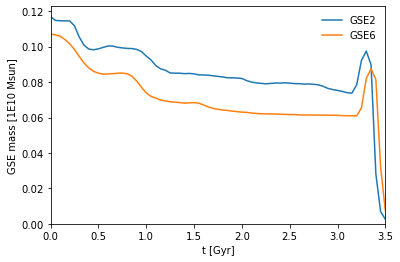

In [9]:
plt.plot(Time, MassIn10kpc[2], label='GSE2')
plt.plot(Time_035, MassIn10kpc_035[2], label='GSE6')

plt.legend(frameon=False)

plt.xlabel('t [Gyr]')
plt.ylabel('GSE mass [1E10 Msun]')
plt.xlim(0, 3.5)
plt.ylim(0, None)

(0.0, 0.09874931916433982)

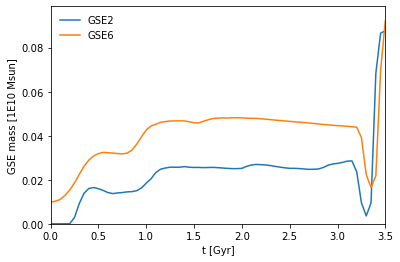

In [10]:
plt.plot(Time, MassOut10kpc[2], label='GSE2')
plt.plot(Time_035, MassOut10kpc_035[2], label='GSE6')

plt.legend(frameon=False)

plt.xlabel('t [Gyr]')
plt.ylabel('GSE mass [1E10 Msun]')
plt.xlim(0, 3.5)
plt.ylim(0, None)

In [45]:
name = 'MW3_MHG0.35_GSE2-lvl4'
snap = 300
fname = basepath + 'anlys/MC/'+name+'/MC_Prop_'+str(snap).zfill(3)+'.h5'
f = h5.File(fname, mode='r')

(-80.0, 80.0)

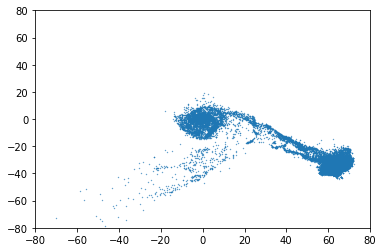

In [46]:
pos = f['PartType5/RotatedCoordinates'][:]
memb  = f['PartType5/Membership'][:]
pos = pos[memb==2]

plt.scatter(pos[:,0], pos[:,1], s=0.1)
plt.xlim(-80, 80)
plt.ylim(-80, 80)